<img src="./images/banner.png" width="800">

# Introduction to Ensemble Methods

Ensemble learning is a powerful approach in machine learning that combines multiple models to create a more robust and accurate predictive system. This technique has gained significant popularity due to its ability to improve model performance and generalization.


Ensemble learning is a machine learning paradigm where multiple models (often called "weak learners" or "base models") are trained to solve the same problem and combined to get better results. The main idea behind ensemble methods is that a group of weak learners can come together to form a strong learner.


<img src="./images/ensemble-learning.webp" width="600">

💡 **Tip:** Think of ensemble learning as a "committee" of models making decisions together, rather than relying on a single model's judgment.


The fundamental principle of ensemble learning is to leverage the "wisdom of the crowd." In machine learning terms, this means:

1. Training multiple models on the same or slightly different datasets
2. Using various algorithms or variations of the same algorithm
3. Combining the predictions of these models in a way that reduces the overall error


The ensemble's prediction is typically more accurate than any individual model's prediction.


There are several types of ensemble methods, but the three main categories are:

1. **Bagging (Bootstrap Aggregating)**: Creates multiple subsets of the original dataset through random sampling with replacement, trains a model on each subset, and combines predictions through voting or averaging.

2. **Boosting**: Trains models sequentially, with each new model focusing on the errors of the previous ones. It assigns higher weights to misclassified instances.

3. **Stacking**: Uses predictions from multiple models as inputs to a final "meta-model" that learns how to best combine these predictions.


Let's consider a simple ensemble of $N$ classifiers. For a given input $x$, each classifier $h_i(x)$ produces a prediction. The final prediction $H(x)$ of the ensemble can be represented as:

For classification tasks:
$$H(x) = \text{mode}(h_1(x), h_2(x), ..., h_N(x))$$ 

For regression tasks:
$$H(x) = \frac{1}{N} \sum_{i=1}^N h_i(x)$$


To illustrate the concept, let's consider a binary classification problem with three weak classifiers:


In [1]:
def weak_classifier1(x):
    return 1 if x > 0.5 else 0

def weak_classifier2(x):
    return 1 if x > 0.6 else 0

def weak_classifier3(x):
    return 1 if x > 0.4 else 0

def ensemble_classifier(x):
    votes = [weak_classifier1(x), weak_classifier2(x), weak_classifier3(x)]
    return 1 if sum(votes) > len(votes) / 2 else 0

# Example usage
x = 0.55
print(f"Ensemble prediction for x = {x}: {ensemble_classifier(x)}")

Ensemble prediction for x = 0.55: 1


In this example, the ensemble makes a decision based on the majority vote of the three weak classifiers.


❗️ **Important Note:** While this example uses simple threshold-based classifiers, in practice, ensemble methods often use more sophisticated base models like decision trees, neural networks, or support vector machines.


Ensemble learning is a versatile and powerful technique in machine learning. As we delve deeper into specific ensemble methods in the following sections, we'll explore how these principles are applied in various algorithms and their practical implications in solving real-world problems.

**Table of contents**<a id='toc0_'></a>    
- [The Wisdom of the Crowd: Why Ensemble Methods Work](#toc1_)    
  - [The Wisdom of the Crowd Phenomenon](#toc1_1_)    
  - [Statistical Reasons for Ensemble Effectiveness](#toc1_2_)    
  - [Diversity and Decorrelation](#toc1_3_)    
  - [Overcoming Individual Model Weaknesses](#toc1_4_)    
  - [Practical Example: Voting Classifier](#toc1_5_)    
- [Types of Ensemble Methods](#toc2_)    
  - [Parallel Ensemble Methods](#toc2_1_)    
    - [Bagging (Bootstrap Aggregating)](#toc2_1_1_)    
    - [Random Forests](#toc2_1_2_)    
    - [Extra Trees (Extremely Randomized Trees)](#toc2_1_3_)    
  - [Sequential Ensemble Methods](#toc2_2_)    
    - [Boosting](#toc2_2_1_)    
  - [Stacking (Stacked Generalization)](#toc2_3_)    
  - [Voting Ensembles](#toc2_4_)    
  - [Practical Example: Comparing Ensemble Methods](#toc2_5_)    
- [Advantages and Challenges of Ensemble Methods](#toc3_)    
  - [Advantages of Ensemble Methods](#toc3_1_)    
  - [Challenges and Considerations](#toc3_2_)    
- [Ensemble Diversity: Key to Success](#toc4_)    
  - [Methods to Introduce Diversity](#toc4_1_)    
  - [Measuring and Optimizing Diversity](#toc4_2_)    
  - [Practical Implementation](#toc4_3_)    
  - [Monitoring and Evaluation](#toc4_4_)    
- [Combining Predictions in Ensembles](#toc5_)    
  - [Voting Mechanisms](#toc5_1_)    
  - [Weighted Combination Methods](#toc5_2_)    
  - [Model Calibration](#toc5_3_)    
  - [Error Correlation and Diversity](#toc5_4_)    
  - [Best Practices for Combining Predictions](#toc5_5_)    
- [Evaluating Ensemble Models](#toc6_)    
  - [Ensemble-Specific Metrics](#toc6_1_)    
  - [Cross-Validation Strategies](#toc6_2_)    
- [Summary](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[The Wisdom of the Crowd: Why Ensemble Methods Work](#toc0_)

Ensemble methods have proven to be remarkably effective in improving machine learning model performance. This section delves into the underlying principles that make ensemble methods so powerful, drawing parallels with the concept of "wisdom of the crowd" from social science.


### <a id='toc1_1_'></a>[The Wisdom of the Crowd Phenomenon](#toc0_)


The term "wisdom of the crowd" was popularized by James Surowiecki in his 2004 book of the same name. It refers to the phenomenon where the collective opinion of a group of individuals is often more accurate than the opinion of any single expert. This concept has found its way into machine learning through ensemble methods.


<img src="./images/wisdom.jpg" width="400">

In the context of machine learning, the "crowd" consists of multiple models or learners, each with its own strengths and weaknesses. By combining these diverse models, we can often achieve better overall performance than any single model could provide.


### <a id='toc1_2_'></a>[Statistical Reasons for Ensemble Effectiveness](#toc0_)


There are several statistical reasons why ensemble methods tend to outperform individual models:

1. **Reduction of Variance**: Ensemble methods, particularly bagging techniques, help reduce the variance of the model. By training multiple models on different subsets of the data, we can average out the fluctuations caused by the specific choice of training data.

2. **Reduction of Bias**: Some ensemble methods, like boosting, can reduce bias by sequentially focusing on the errors of previous models. This allows the ensemble to learn more complex patterns than any single model might be capable of capturing.

3. **Expanded Hypothesis Space**: By combining multiple models, ensemble methods can effectively search a larger space of possible hypotheses. This increases the likelihood of finding a good approximation of the true underlying function.


### <a id='toc1_3_'></a>[Diversity and Decorrelation](#toc0_)


A key factor in the success of ensemble methods is the diversity of the base models. If all models make the same mistakes, combining them won't yield any benefit. The goal is to have models that make different errors, so that when combined, they can correct each other's mistakes.


<img src="./images/diverse-predictors.png" width="800">

There are several ways to introduce diversity in an ensemble:

1. **Data Sampling**: Using different subsets of the training data for each model (as in bagging).
2. **Feature Sampling**: Using different subsets of features for each model (as in Random Forests).
3. **Algorithm Diversity**: Using different types of models or different hyperparameters.


The concept of decorrelation is closely related to diversity. The correlation between errors of different models in the ensemble should be as low as possible for maximum effectiveness.


### <a id='toc1_4_'></a>[Overcoming Individual Model Weaknesses](#toc0_)


Ensemble methods can often overcome the limitations of individual models:

1. **Handling Complex Decision Boundaries**: While a single model might struggle with complex decision boundaries, an ensemble can approximate complex functions by combining simpler models.

2. **Robustness to Outliers**: Ensemble methods can be more robust to outliers and noise in the data, as the impact of any single datapoint is reduced through the combination of multiple models.

3. **Handling Imbalanced Datasets**: Some ensemble methods, like boosting, can effectively handle imbalanced datasets by focusing on misclassified examples.


💡 **Tip:** When designing an ensemble, aim for a diverse set of base models that make uncorrelated errors. This maximizes the benefit of combining their predictions.


### <a id='toc1_5_'></a>[Practical Example: Voting Classifier](#toc0_)


To illustrate the concept, let's consider a simple voting classifier ensemble using scikit-learn:


In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Create a synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# Define base models
model1 = LogisticRegression(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = SVC(probability=True, random_state=42)

In [6]:
# Create and train the ensemble
ensemble = VotingClassifier(
    estimators=[("lr", model1), ("dt", model2), ("svc", model3)], voting="soft"
)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [7]:
# Make predictions and calculate accuracy
y_pred = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Ensemble Accuracy: 0.8950


In [8]:
# Compare with individual model accuracies
for name, model in ensemble.named_estimators_.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

lr Accuracy: 0.8250
dt Accuracy: 0.7900
svc Accuracy: 0.9350


This example demonstrates how an ensemble of diverse models (logistic regression, decision tree, and support vector machine) can potentially outperform any individual model.


❗️ **Important Note:** While ensemble methods are powerful, they are not a silver bullet. They can be computationally expensive and may lead to overfitting if not properly regularized. Always consider the trade-offs between model complexity, computational resources, and performance gains when deciding to use ensemble methods.


In the next sections, we'll explore specific ensemble techniques in more detail, including bagging, boosting, and stacking, to see how these principles are applied in practice.

## <a id='toc2_'></a>[Types of Ensemble Methods](#toc0_)

Ensemble methods in machine learning can be categorized into several types, each with its own unique approach to combining multiple models. In this section, we'll explore the main types of ensemble methods, their characteristics, and how they leverage the collective power of multiple models to improve predictive performance.


### <a id='toc2_1_'></a>[Parallel Ensemble Methods](#toc0_)


Parallel ensemble methods involve creating multiple independent models and combining their predictions. These methods are often easier to implement and can be parallelized for faster computation.


#### <a id='toc2_1_1_'></a>[Bagging (Bootstrap Aggregating)](#toc0_)


Bagging is one of the earliest and most intuitive ensemble techniques. It involves:

1. Creating multiple subsets of the original dataset through random sampling with replacement (bootstrap sampling).
2. Training a separate model on each subset.
3. Combining predictions through voting (for classification) or averaging (for regression).


<img src="./images/bagging.png" width="800">

Mathematical representation for bagging in regression:

$$f_{bag}(x) = \frac{1}{B} \sum_{i=1}^B f_i(x)$$

Where $B$ is the number of bootstrap samples, and $f_i(x)$ is the prediction of the $i$-th model.


💡 **Tip:** Bagging is particularly effective for high-variance models like decision trees, as it helps reduce overfitting.


#### <a id='toc2_1_2_'></a>[Random Forests](#toc0_)


Random Forests are an extension of bagging specifically designed for decision trees. They introduce an additional layer of randomness:

1. Create bootstrap samples of the dataset.
2. For each sample, train a decision tree, but at each node, only consider a random subset of features for splitting.
3. Combine predictions through voting or averaging.


<img src="./images/random-forest.jpg" width="800">

The key difference from bagging is the feature subsampling, which decorrelates the trees and further reduces variance.


#### <a id='toc2_1_3_'></a>[Extra Trees (Extremely Randomized Trees)](#toc0_)


Extra Trees take the randomization in Random Forests one step further:

1. Use the entire training set (no bootstrap sampling).
2. At each node, randomly select features and split points.
3. Choose the best split among these random splits.


<img src="./images/extra-trees.png" width="800">

This increased randomness can lead to lower variance but potentially higher bias compared to Random Forests.


### <a id='toc2_2_'></a>[Sequential Ensemble Methods](#toc0_)


Sequential ensemble methods train models in a sequence, with each subsequent model trying to correct the errors of the previous ones.


#### <a id='toc2_2_1_'></a>[Boosting](#toc0_)


Boosting is a family of algorithms that convert weak learners into strong learners. The key ideas are:

1. Train models sequentially.
2. Each new model focuses on the errors of the previous ensemble.
3. Assign higher weights to misclassified instances.


<img src="./images/boosting.png" width="800">

Some popular boosting algorithms include:

- **AdaBoost (Adaptive Boosting)**: Adjusts the weights of misclassified instances and the weights of classifiers in the ensemble.
- **Gradient Boosting**: Trains each model to predict the residuals (errors) of the previous models.
- **XGBoost, LightGBM, CatBoost**: Advanced implementations of gradient boosting with optimizations for speed and performance.


Mathematical representation for gradient boosting:

$$F_m(x) = F_{m-1}(x) + \alpha_m h_m(x)$$

Where $F_m(x)$ is the model at iteration $m$, $h_m(x)$ is the weak learner, and $\alpha_m$ is the weight assigned to this learner.


❗️ **Important Note:** While boosting can achieve high accuracy, it can be prone to overfitting, especially on noisy datasets. Proper regularization and early stopping are crucial.


### <a id='toc2_3_'></a>[Stacking (Stacked Generalization)](#toc0_)


Stacking is a meta-learning approach that involves:

1. Training multiple diverse base models.
2. Using their predictions as features for a higher-level model (meta-model).
3. The meta-model learns how to best combine the predictions of the base models.


<img src="./images/stacking.png" width="800">

<img src="./images/stacking-2.jpg" width="800">

Mathematically, for base models $f_1, f_2, ..., f_k$ and meta-model $g$, the stacked prediction is:

$$f_{stack}(x) = g(f_1(x), f_2(x), ..., f_k(x))$$

Stacking can often achieve better performance than any of the individual models, but it requires careful cross-validation to prevent overfitting.


### <a id='toc2_4_'></a>[Voting Ensembles](#toc0_)


Voting ensembles combine predictions from multiple models through voting mechanisms:

1. **Hard Voting**: Each model makes a prediction (vote), and the class with the most votes wins.
2. **Soft Voting**: Models provide probability estimates for each class, which are averaged, and the class with the highest average probability is chosen.


<img src="./images/voting.png" width="800">

<img src="./images/soft-hard-voting.ppm" width="800">

Mathematically, for soft voting with $K$ models:

$$P(y|x) = \frac{1}{K} \sum_{i=1}^K P_i(y|x)$$

Where $P_i(y|x)$ is the probability estimate from the $i$-th model.


### <a id='toc2_5_'></a>[Practical Example: Comparing Ensemble Methods](#toc0_)


Let's implement and compare different ensemble methods using scikit-learn:


In [9]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Define models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

# Create a voting ensemble
voting = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('dt', dt), ('lr', lr)],
    voting='soft'
)

# List of models to evaluate
models = [rf, gb, dt, lr, voting]
model_names = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Logistic Regression', 'Voting Ensemble']

# Perform cross-validation and print results
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

Random Forest - Mean Accuracy: 0.9160 (+/- 0.0331)
Gradient Boosting - Mean Accuracy: 0.9010 (+/- 0.0662)
Decision Tree - Mean Accuracy: 0.7850 (+/- 0.0494)
Logistic Regression - Mean Accuracy: 0.8110 (+/- 0.0325)
Voting Ensemble - Mean Accuracy: 0.8730 (+/- 0.0771)


This example demonstrates how different ensemble methods compare to individual models and a voting ensemble. The results will likely show that ensemble methods (Random Forest, Gradient Boosting, and Voting Ensemble) outperform individual models like Decision Tree and Logistic Regression.


In the subsequent sections, we'll dive deeper into specific ensemble techniques, exploring their algorithms, advantages, and practical implementations in more detail.

## <a id='toc3_'></a>[Advantages and Challenges of Ensemble Methods](#toc0_)

Ensemble methods have gained significant popularity in machine learning due to their ability to improve model performance. However, like any technique, they come with their own set of advantages and challenges. Understanding these can help practitioners make informed decisions about when and how to use ensemble methods effectively.


### <a id='toc3_1_'></a>[Advantages of Ensemble Methods](#toc0_)


1. **Improved Prediction Accuracy**


One of the primary benefits of ensemble methods is their ability to achieve higher prediction accuracy compared to individual models. By combining multiple models, ensembles can capture a broader range of patterns in the data and reduce the impact of individual model errors.


Mathematically, this can be demonstrated using the bias-variance decomposition. For a given ensemble of $M$ independent models with equal weights, the mean squared error (MSE) of the ensemble is:

$$MSE_{ensemble} = Bias^2 + \frac{1}{M}Variance$$

As $M$ increases, the variance component decreases, leading to lower overall error.


2. **Better Generalization**


Ensemble methods often exhibit better generalization to unseen data. By combining diverse models, ensembles can reduce overfitting that might occur with individual models. This is particularly true for techniques like bagging, which use different subsets of the training data for each model.


3. **Robustness to Outliers and Noise**


Ensemble methods can be more robust to outliers and noise in the data. For example, in a voting ensemble, the impact of a single model making an incorrect prediction due to an outlier is mitigated by the collective decision of all models.


4. **Handling of Complex Relationships**


Ensembles can capture complex, non-linear relationships in the data that might be difficult for a single model to learn. For instance, a combination of linear models and decision trees in an ensemble can model both linear and non-linear patterns effectively.


💡 **Tip:** When dealing with high-dimensional data, ensemble methods that incorporate feature selection or importance ranking can be particularly useful.


### <a id='toc3_2_'></a>[Challenges and Considerations](#toc0_)


1. **Increased Computational Complexity**


Ensemble methods typically require training and storing multiple models, which can significantly increase computational requirements, both in terms of training time and memory usage. This can be a challenge when working with large datasets or in resource-constrained environments.


2. **Risk of Overfitting**


While ensembles can help reduce overfitting, they are not immune to it. If not properly tuned, ensemble methods (especially boosting algorithms) can overfit the training data. This is particularly true when using complex base models or when the ensemble size is too large.


3. **Reduced Interpretability**


Ensemble models, especially those combining different types of algorithms, can be more difficult to interpret than single models. This "black box" nature can be a drawback in applications where model interpretability is crucial, such as in healthcare or finance.


4. **Increased Model Complexity**


The complexity of ensemble models can make them more challenging to deploy and maintain in production environments. This includes issues related to version control, model updates, and explaining predictions to stakeholders.


5. **Hyperparameter Tuning**


Ensemble methods often introduce additional hyperparameters (e.g., number of models, learning rate in boosting), which can make the model tuning process more complex and time-consuming.


6. **Storage Requirements**


Storing multiple models can require significant disk space, especially for large ensembles or when using complex base models. This can be a concern in environments with limited storage capacity.


❗️ **Important Note:** While ensemble methods offer many advantages, it's crucial to consider the specific requirements of your project, including computational resources, interpretability needs, and the complexity of the problem, when deciding whether to use ensemble methods.


In the next sections, we'll explore techniques for ensuring diversity in ensembles and methods for combining predictions, which are key to leveraging the full potential of ensemble learning.

## <a id='toc4_'></a>[Ensemble Diversity: Key to Success](#toc0_)

Model diversity refers to the degree to which different models in an ensemble make uncorrelated errors. This concept is fundamental to the success of ensemble methods. When ensemble members make different types of errors on different instances, their combination can lead to better overall predictions.


💡 **Tip:** The more diverse the models (higher ambiguity), the lower the ensemble error, provided the individual models maintain reasonable accuracy.


### <a id='toc4_1_'></a>[Methods to Introduce Diversity](#toc0_)


Diversity in ensemble learning can be introduced through various techniques:


**Data Sampling Diversity**
- Bootstrap sampling (random sampling with replacement)
- Different training set partitions
- Cross-validation folds
- Weighted sampling of instances


```python
def create_diverse_datasets(X, y, n_subsets=5):
    n_samples = len(X)
    datasets = []

    for _ in range(n_subsets):
        # Bootstrap sampling
        indices = np.random.choice(n_samples, n_samples, replace=True)
        datasets.append((X[indices], y[indices]))

    return datasets
```


**Algorithm Diversity**
- Using different learning algorithms
- Varying model architectures
- Different initialization points
- Diverse hyperparameter settings


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

def create_diverse_ensemble():
    estimators = [
        ('lr', LogisticRegression()),
        ('svm', SVC(probability=True)),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier(n_estimators=10))
    ]

    return VotingClassifier(estimators=estimators, voting='soft')

**Feature Diversity**
- Random feature subsets
- Different feature transformations
- Feature weighting
- Principal Component Analysis (PCA) with different numbers of components


### <a id='toc4_2_'></a>[Measuring and Optimizing Diversity](#toc0_)


Diversity can be measured using several metrics and approaches:


**Diversity Metrics:**

In [21]:

import numpy as np

def calculate_disagreement(pred1, pred2):
    """Calculate disagreement between two model predictions"""
    return np.mean(pred1 != pred2)

def ensemble_diversity_matrix(predictions_list):
    """Calculate pairwise diversity matrix for ensemble members"""
    n_models = len(predictions_list)
    diversity_matrix = np.zeros((n_models, n_models))

    for i in range(n_models):
        for j in range(i+1, n_models):
            div = calculate_disagreement(predictions_list[i], predictions_list[j])
            diversity_matrix[i,j] = div
            diversity_matrix[j,i] = div

    return diversity_matrix

model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
model_1.fit(X, y)
model_2.fit(X, y)
model_3.fit(X, y)

predictions_list = [model_1.predict(X), model_2.predict(X), model_3.predict(X)]
diversity_matrix = ensemble_diversity_matrix(predictions_list)


In [22]:
print(diversity_matrix)

[[0.    0.183 0.183]
 [0.183 0.    0.   ]
 [0.183 0.    0.   ]]


**Optimization Strategies:**
- Explicit diversity promotion through penalizing correlated predictions
- Enforcing negative correlation between models
- Using diversity metrics in model selection
- Random initialization and varied architectural choices


### <a id='toc4_3_'></a>[Practical Implementation](#toc0_)


Here's a comprehensive example that combines the concepts discussed:


In [13]:
class DiverseEnsemble:
    def __init__(self, n_models=5):
        self.n_models = n_models
        self.models = []
        self.diversity_matrix = None

    def create_base_models(self):
        """Create diverse base models with different configurations"""
        models = []
        models.append(DecisionTreeClassifier(max_depth=5))
        models.append(DecisionTreeClassifier(max_depth=10))
        models.append(LogisticRegression())
        models.append(RandomForestClassifier(n_estimators=10))
        models.append(SVC(probability=True))
        return models[: self.n_models]

    def fit(self, X, y):
        """Train the ensemble with diversity monitoring"""
        self.models = self.create_base_models()
        predictions = []

        for model in self.models:
            # Create bootstrap sample
            indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y[indices]

            # Train model
            model.fit(X_bootstrap, y_bootstrap)
            predictions.append(model.predict(X))

        # Calculate diversity
        self.diversity_matrix = ensemble_diversity_matrix(predictions)
        return self

    def predict(self, X):
        """Make predictions using majority voting"""
        predictions = np.array([model.predict(X) for model in self.models])
        return np.apply_along_axis(
            lambda x: np.bincount(x).argmax(), axis=0, arr=predictions
        )

❗️ **Important Note:** While maximizing diversity is important, it should not come at the expense of individual model accuracy. The goal is to find the right balance between diversity and performance.


## <a id='toc5_'></a>[Combining Predictions in Ensembles](#toc0_)

In ensemble learning, combining predictions from multiple models is a crucial step. This section explores different methods for combining predictions, including voting mechanisms, weighted averaging, and model calibration.


### <a id='toc5_1_'></a>[Voting Mechanisms](#toc0_)


Voting is one of the most fundamental ways to combine predictions from multiple models. There are several voting strategies that can be employed depending on the problem type and requirements.


**Hard Voting (Majority Voting)**
In hard voting, each model makes a prediction (casts a vote), and the class that receives the most votes becomes the final prediction. This is particularly useful for classification problems.

$$\hat{y} = \text{mode}(y_1, y_2, ..., y_M)$$

where $y_i$ is the prediction of the $i$-th model.


**Soft Voting (Average Probability)**
In soft voting, models provide probability estimates for each class, which are then averaged to make the final prediction. This often performs better than hard voting as it takes into account the confidence of each model.

$$P(y=k|x) = \frac{1}{M}\sum_{i=1}^M P_i(y=k|x)$$

where $P_i(y=k|x)$ is the probability estimate for class k from model i.


Here's an example implementing both voting mechanisms:


In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create base models
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))  # probability=True is required for soft voting
]

# Create voting classifiers
voting_hard = VotingClassifier(estimators=estimators, voting='hard')
voting_soft = VotingClassifier(estimators=estimators, voting='soft')

# The VotingClassifier automatically handles the voting process
# Hard voting uses predict() method
# Soft voting uses predict_proba() method internally
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

voting_hard.fit(X, y)
voting_soft.fit(X, y)

print(f"Hard Voting Accuracy: {voting_hard.score(X, y)}")
print(f"Soft Voting Accuracy: {voting_soft.score(X, y)}")


Hard Voting Accuracy: 0.976
Soft Voting Accuracy: 0.988


### <a id='toc5_2_'></a>[Weighted Combination Methods](#toc0_)


Weighted combinations assign different importance to different models based on their performance or expertise.


**Weighted Averaging**
The final prediction is a weighted sum of individual predictions:

$$\hat{y} = \sum_{i=1}^M w_i y_i$$

where $w_i$ is the weight assigned to model i, and $\sum w_i = 1$


Here's an implementation of a simple weighted ensemble:


In [17]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

class WeightedEnsemble:
    def __init__(self, models):
        self.models = models
        self.weights = None

    def fit(self, X, y):
        # Calculate weights based on cross-validation performance
        # Higher performing models get higher weights
        scores = []
        for model in self.models:
            # Perform 5-fold cross-validation and take mean score
            cv_score = cross_val_score(model, X, y, cv=5).mean()
            scores.append(cv_score)
            model.fit(X, y)  # Fit the model on full data

        # Normalize scores to get weights
        self.weights = np.array(scores) / np.sum(scores)
        return self

    def predict_proba(self, X):
        # Get weighted probability predictions
        weighted_preds = np.zeros((X.shape[0], len(np.unique(y))))
        for model, weight in zip(self.models, self.weights):
            weighted_preds += weight * model.predict_proba(X)
        return weighted_preds

### <a id='toc5_3_'></a>[Model Calibration](#toc0_)


When combining probability estimates from different models, it's important to ensure they are properly calibrated. Calibration refers to how well the predicted probabilities reflect the actual probabilities of events.


<img src="./images/prob-calibration.png" width="800">

The `CalibratedClassifierCV` from scikit-learn performs probability calibration using either Isotonic regression or Logistic regression.


In [24]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
base_clf = GaussianNB()

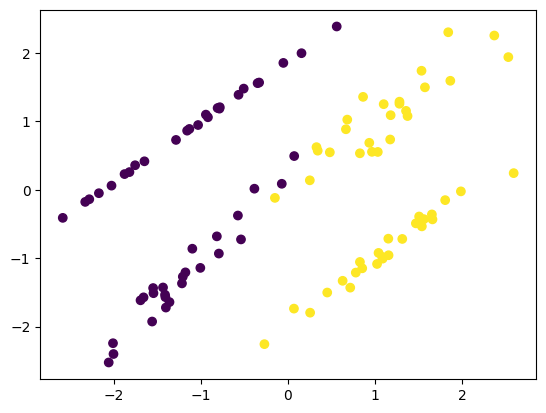

In [31]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

In [25]:
calibrated_clf = CalibratedClassifierCV(base_clf, cv=3)
calibrated_clf.fit(X, y)
len(calibrated_clf.calibrated_classifiers_)

3

In [26]:
calibrated_clf.predict_proba(X)[:5, :]

array([[0.11009899, 0.88990101],
       [0.0722637 , 0.9277363 ],
       [0.92831857, 0.07168143],
       [0.92834456, 0.07165544],
       [0.07186088, 0.92813912]])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X, y, random_state=42)
base_clf = GaussianNB()
base_clf.fit(X_train, y_train)
calibrated_clf = CalibratedClassifierCV(base_clf, cv="prefit")
calibrated_clf.fit(X_calib, y_calib)

CalibratedClassifierCV(cv='prefit', estimator=GaussianNB())

In [29]:
len(calibrated_clf.calibrated_classifiers_)

1

In [30]:
calibrated_clf.predict_proba([[-0.5, 0.5]])

array([[0.93677312, 0.06322688]])

### <a id='toc5_4_'></a>[Error Correlation and Diversity](#toc0_)


The effectiveness of ensemble combinations depends heavily on the correlation between model errors. Models with uncorrelated errors tend to perform better when combined.


Here's a simple way to measure prediction correlation between models:


In [23]:

def calculate_prediction_correlation(models, X):
    """
    Calculate correlation matrix of model predictions.

    Parameters:
    - models: List of fitted models
    - X: Input features

    Returns:
    - Correlation matrix of predictions
    """
    predictions = np.array([model.predict(X) for model in models])
    return np.corrcoef(predictions)


models = [model_1, model_2, model_3]
calculate_prediction_correlation(models, X)

array([[1.        , 0.63407053, 0.63407053],
       [0.63407053, 1.        , 1.        ],
       [0.63407053, 1.        , 1.        ]])

### <a id='toc5_5_'></a>[Best Practices for Combining Predictions](#toc0_)


1. **Validation Strategy**
   - Use separate validation sets for:
     - Training base models
     - Determining combination weights
     - Final evaluation

2. **Diversity Consideration**
   - Monitor prediction correlations
   - Include models with different learning algorithms
   - Use different feature subsets or data sampling techniques

3. **Calibration**
   - Ensure probability estimates are well-calibrated before combining
   - Use proper calibration techniques when necessary

4. **Computational Efficiency**
   - Consider the trade-off between ensemble size and performance
   - Implement parallel processing for large ensembles when possible


💡 **Tip:** Start with simple combination methods (like averaging or majority voting) before moving to more complex approaches. Often, simple methods perform just as well as more sophisticated ones.


❗️ **Important Note:** The choice of combination method should be based on your specific problem requirements, including:
- The type of problem (classification vs regression)
- The importance of probabilistic predictions
- Computational constraints
- Interpretability requirements

## <a id='toc6_'></a>[Evaluating Ensemble Models](#toc0_)


When evaluating ensemble models, we start with standard performance metrics but need to consider additional aspects specific to ensembles. The basic metrics include:



**Classification Tasks:**
- Accuracy, Precision, Recall, F1-Score
- ROC-AUC and PR-AUC
- Log Loss (especially important for probabilistic ensembles)



**Regression Tasks:**
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R-squared Score



Here's a comprehensive evaluation function that covers these metrics:



```python
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, log_loss

def evaluate_ensemble_classifier(ensemble, X, y_true):
    """
    Comprehensive evaluation of an ensemble classifier.
    
    Parameters:
    - ensemble: Fitted ensemble model
    - X: Feature matrix
    - y_true: True labels
    
    Returns:
    - Dictionary of evaluation metrics
    """
    # Get predictions and probabilities
    y_pred = ensemble.predict(X)
    y_prob = ensemble.predict_proba(X)
    
    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted'
    )
    
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'log_loss': log_loss(y_true, y_prob),
        'roc_auc': roc_auc_score(y_true, y_prob[:, 1])  # For binary classification
    }
    
    return metrics
```



### <a id='toc6_1_'></a>[Ensemble-Specific Metrics](#toc0_)



Beyond basic metrics, ensembles require additional evaluation criteria:



**1. Diversity Measures**
The degree of disagreement between ensemble members:



```python
def calculate_diversity(predictions_matrix):
    """
    Calculate diversity metrics for ensemble predictions.
    
    Parameters:
    - predictions_matrix: Array of shape (n_models, n_samples) containing
                        predictions from each model
    """
    n_models = predictions_matrix.shape[0]
    n_samples = predictions_matrix.shape[1]
    
    # Calculate disagreement matrix
    disagreement = np.zeros((n_models, n_models))
    for i in range(n_models):
        for j in range(i+1, n_models):
            disagreement[i,j] = np.mean(predictions_matrix[i] != predictions_matrix[j])
            disagreement[j,i] = disagreement[i,j]
    
    return {
        'mean_disagreement': np.mean(disagreement),
        'disagreement_matrix': disagreement
    }
```



**2. Individual Model Contributions**
Assessing how each model contributes to the ensemble's performance:



```python
def evaluate_model_contributions(ensemble, X, y):
    """
    Evaluate the contribution of each model to the ensemble.
    """
    base_score = ensemble.score(X, y)
    contributions = []
    
    for i, model in enumerate(ensemble.estimators_):
        # Create ensemble without current model
        temp_preds = [est.predict(X) for j, est in enumerate(ensemble.estimators_)
                     if j != i]
        temp_score = accuracy_score(y, np.mean(temp_preds, axis=0) > 0.5)
        
        # Contribution is the difference in performance
        contribution = base_score - temp_score
        contributions.append(contribution)
    
    return contributions
```



### <a id='toc6_2_'></a>[Cross-Validation Strategies](#toc0_)



Ensemble models require careful cross-validation to avoid overfitting:



```python
from sklearn.model_selection import KFold

def ensemble_cross_validate(ensemble, X, y, n_splits=5):
    """
    Perform cross-validation specifically designed for ensembles.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Split data
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Train ensemble
        ensemble.fit(X_train, y_train)
        
        # Evaluate
        scores.append(evaluate_ensemble_classifier(ensemble, X_val, y_val))
    
    return scores
```


## <a id='toc7_'></a>[Summary](#toc0_)

Ensemble learning combines multiple models to create a more robust and accurate predictive system. Throughout this introduction, we've covered several fundamental aspects:

1. **Types of Ensemble Methods**
   - Parallel methods (Bagging, Random Forests)
   - Sequential methods (Boosting)
   - Stacking and meta-learning approaches

2. **Diversity in Ensembles**
   - Model diversity as a key success factor
   - Various methods to introduce diversity
   - Balance between diversity and individual model performance

3. **Prediction Combination**
   - Voting mechanisms (hard and soft voting)
   - Weighted combination methods
   - Dynamic and adaptive combination strategies

4. **Evaluation Approaches**
   - Standard performance metrics
   - Ensemble-specific evaluation criteria
   - Cross-validation strategies


Be aware of these common mistakes:

1. **Overfitting**
   - Using too many models
   - Over-complex combination methods
   - Insufficient validation

2. **Computational Inefficiency**
   - Unnecessarily large ensembles
   - Redundant model combinations
   - Inefficient implementation

3. **Poor Model Selection**
   - Lack of diversity among base models
   - Inappropriate base model choices
   - Ignoring problem-specific requirements


To deepen your understanding of ensemble methods:

1. **Further Study**
   - Explore specific ensemble algorithms in detail
   - Study advanced combination techniques
   - Learn about domain-specific applications

2. **Practical Experience**
   - Implement different ensemble types
   - Experiment with various combination methods
   - Practice with real-world datasets

3. **Advanced Topics**
   - Deep learning ensembles
   - Online learning
   - Distributed ensemble systems


This introduction to ensemble methods provides a foundation for understanding and implementing these powerful techniques. The key is to start with simple approaches and gradually incorporate more complex methods as needed for your specific problem domain.


Remember that successful ensemble learning requires a balance of theoretical understanding and practical implementation skills, always guided by proper evaluation and validation strategies.